In [1]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit
import pickle

---

In [1]:
#First we read collected and already cleaned data
#marburg = pd.read_csv("../data_0/marburg.csv")
#duisburg = pd.read_csv("../data_0/duisburg.csv")
#marburg_weather = pd.read_csv("../data_0/weather/marburg_weather.csv")
#duisburg_weather = pd.read_csv("../data_0/weather/duisburg_weather.csv")

# KPIs

## Utilization / Peak Utilization (Anne)

### Marburg

In [6]:
#Read in data
marburg = pd.read_pickle('../0_data/marburg_clean.pkl')
fleet_size = len(marburg["b_number"].unique())
marburg
kpi_mar = pd.DataFrame()

In [11]:
#setting start and end date of the trips (start is rounded down hourly)
marburg["start"] = marburg.index.floor(freq = "H")
marburg['end'] = marburg.index + pd.to_timedelta(marburg['trip_duration_mins'], unit='m')
marburg

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,start,end
datetime,,,,,,,,,,,
2019-07-04 13:29:00,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,2019-07-04 13:00:00,2019-07-04 14:10:00
2019-07-06 16:53:00,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,2019-07-06 16:00:00,2019-07-06 17:12:00
2019-07-06 17:18:00,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,2019-07-06 17:00:00,2019-07-06 18:19:00
2019-07-06 20:11:00,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,2019-07-06 20:00:00,2019-07-06 20:41:00
2019-07-07 08:47:00,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,2019-07-07 08:00:00,2019-07-07 08:59:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-19 12:57:00,2019-05-19,12:57:00,91116,marburg,"(50.8279, 8.7751)","(50.8137, 8.7707)",6,12,20,2019-05-19 12:00:00,2019-05-19 13:17:00
2019-05-19 21:41:00,2019-05-19,21:41:00,91116,marburg,"(50.8137, 8.7707)","(50.8229, 8.7747)",6,21,7,2019-05-19 21:00:00,2019-05-19 21:48:00
2019-05-20 06:56:00,2019-05-20,06:56:00,91116,marburg,"(50.8229, 8.7747)","(50.82, 8.7737)",0,6,3,2019-05-20 06:00:00,2019-05-20 06:59:00


In [12]:
#computing availablility by grouping by datetime and checking the number of diiferent bike numbers
kpi_mar["util"]  = marburg.groupby("start")["b_number"].nunique()
kpi_mar["util"]

start
2019-01-20 00:00:00     6
2019-01-20 01:00:00     8
2019-01-20 02:00:00     5
2019-01-20 03:00:00     1
2019-01-20 04:00:00     2
                       ..
2020-01-20 19:00:00    30
2020-01-20 20:00:00    25
2020-01-20 21:00:00    15
2020-01-20 22:00:00     9
2020-01-20 23:00:00     4
Name: util, Length: 8345, dtype: int64

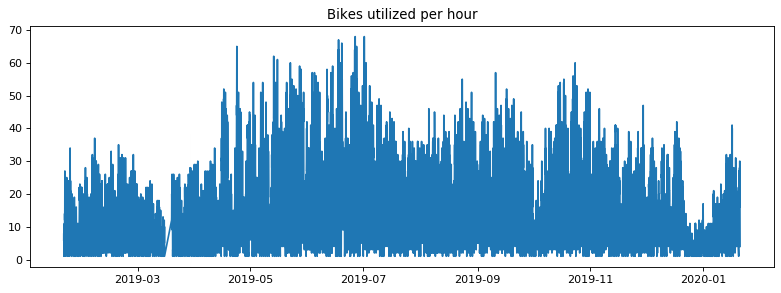

In [16]:
#plotting availability
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(kpi_mar["util"])
ax.set_title("Bikes utilized per hour")
plt.show()

In [14]:
#creating day column
kpi_mar["date"] = kpi_mar.index.date
kpi_mar

,avail,util,date
start,,,
2019-01-20 00:00:00,6,6,2019-01-20
2019-01-20 01:00:00,8,8,2019-01-20
2019-01-20 02:00:00,5,5,2019-01-20
2019-01-20 03:00:00,1,1,2019-01-20
2019-01-20 04:00:00,2,2,2019-01-20
...,...,...,...
2020-01-20 19:00:00,30,30,2020-01-20
2020-01-20 20:00:00,25,25,2020-01-20
2020-01-20 21:00:00,15,15,2020-01-20


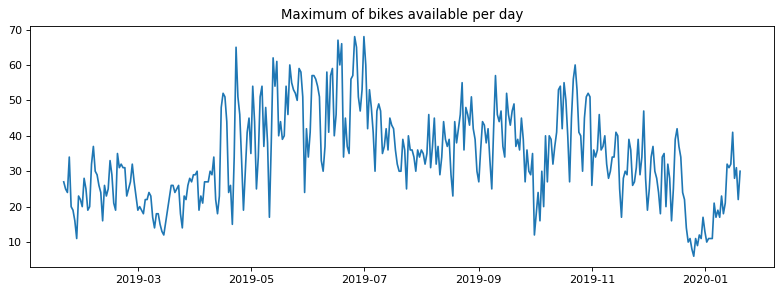

In [15]:
#computing max availaibility per day and plotting it
max_avail = kpi_mar.groupby("date")["util"].max()
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(max_avail)
ax.set_title("Maximum of bikes utilized in one hour per day")
plt.show()

### Duisburg

In [17]:
#Read in data
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
fleet_size = len(duisburg["b_number"].unique())
duisburg
kpi_duis = pd.DataFrame()

In [18]:
#setting start and end date of the trips (start is rounded down hourly)
duisburg["start"] = duisburg.index.floor(freq = "H")
duisburg['end'] = duisburg.index + pd.to_timedelta(duisburg['trip_duration_mins'], unit='m')
duisburg

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,start,end
datetime,,,,,,,,,,,
2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,2019-05-27 14:00:00,2019-05-27 16:01:00
2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,2019-05-27 17:00:00,2019-05-27 18:04:00
2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,2019-05-28 08:00:00,2019-05-28 08:25:00
2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,2019-06-04 09:00:00,2019-06-04 09:25:00
2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,2019-06-05 09:00:00,2019-06-05 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 07:14:00,2020-01-20,07:14:00,501597,duisburg,"(51.4273, 6.7978)","(51.4294, 6.7772)",0,7,21,2020-01-20 07:00:00,2020-01-20 07:35:00
2020-01-20 10:08:00,2020-01-20,10:08:00,501597,duisburg,"(51.4294, 6.7772)","(51.4284, 6.8004)",0,10,10,2020-01-20 10:00:00,2020-01-20 10:18:00
2020-01-20 19:39:00,2020-01-20,19:39:00,501597,duisburg,"(51.4284, 6.8004)","(51.4294, 6.7772)",0,19,11,2020-01-20 19:00:00,2020-01-20 19:50:00


In [19]:
#computing availablility by grouping by datetime and checking the number of diiferent bike numbers
kpi_duis["util"]  = duisburg.groupby("start")["b_number"].nunique()
kpi_duis["util"]

start
2019-01-20 00:00:00     1
2019-01-20 01:00:00     3
2019-01-20 05:00:00     1
2019-01-20 06:00:00     4
2019-01-20 07:00:00     1
                       ..
2020-01-20 19:00:00    14
2020-01-20 20:00:00    15
2020-01-20 21:00:00    10
2020-01-20 22:00:00     5
2020-01-20 23:00:00     4
Name: util, Length: 8288, dtype: int64

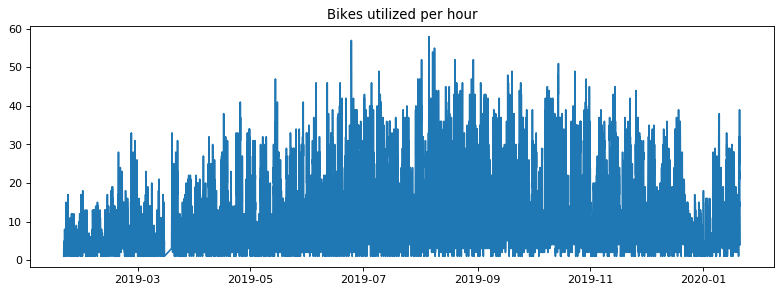

In [20]:
#plotting availability
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(kpi_duis["util"])
ax.set_title("Bikes utilized per hour")
plt.show()

In [22]:
#creating day column
kpi_duis["date"] = kpi_duis.index.date
kpi_duis

,util,date
start,,
2019-01-20 00:00:00,1,2019-01-20
2019-01-20 01:00:00,3,2019-01-20
2019-01-20 05:00:00,1,2019-01-20
2019-01-20 06:00:00,4,2019-01-20
2019-01-20 07:00:00,1,2019-01-20
...,...,...
2020-01-20 19:00:00,14,2020-01-20
2020-01-20 20:00:00,15,2020-01-20
2020-01-20 21:00:00,10,2020-01-20


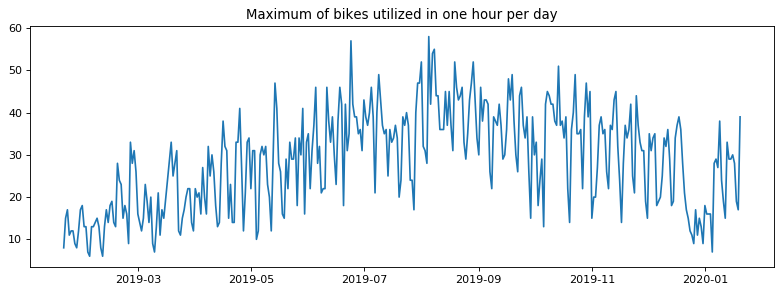

In [23]:
#computing max availaibility per day and plotting it
max_avail = kpi_duis.groupby("date")["util"].max()
fig,ax = plt.subplots(figsize=(12,4), dpi= 80) 

ax.plot(max_avail)
ax.set_title("Maximum of bikes utilized in one hour per day")
plt.show()

## Fleet distance traveled (Tim)

This KPI covers the sum of all kilometres traveled by all bikes in the span of an hour. To do that, we have to calculate the distance of each individual ride, which we then sum up to visualize the distance traveled by the entire fleet in the span for each hour.

### Adding trip_distance for each ride:

Let us start with Marburg first.

In [2]:
# Reading the clean pickle file.

marburg = pd.read_pickle('../0_data/marburg_clean.pkl')

# Here is an overview:

marburg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164057 entries, 2019-07-04 13:29:00 to 2019-05-20 09:38:00
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   day                 164057 non-null  datetime64[ns]
 1   time                164057 non-null  object        
 2   b_number            164057 non-null  int64         
 3   city                164057 non-null  object        
 4   orig                164057 non-null  object        
 5   dest                164057 non-null  object        
 6   weekday             164057 non-null  int64         
 7   hour                164057 non-null  int64         
 8   trip_duration_mins  164057 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 12.5+ MB


In [3]:
# Here we are extracting the latitude and longitude values from the origin and destination coordinates, so
# we can use them indiviudally when calculating the distance between the two coordinates.
# To do this we are using the zip* function.

marburg["lat_orig_test"], marburg["lon_orig_test"] =  zip(*marburg["orig"])
marburg["lat_dest_test"], marburg["lon_dest_test"] =  zip(*marburg["dest"])

#This is what the dataframe looks like now:

marburg.head(10)

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,lat_orig_test,lon_orig_test,lat_dest_test,lon_dest_test
datetime,,,,,,,,,,,,,
2019-07-04 13:29:00,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,50.8081,8.7754,50.8110,8.7742
2019-07-06 16:53:00,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,50.7987,8.7530,50.8058,8.7828
2019-07-06 17:18:00,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,50.8058,8.7828,50.8229,8.7747
2019-07-06 20:11:00,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,50.8200,8.7737,50.7856,8.7794
2019-07-07 08:47:00,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,50.7856,8.7794,50.7952,8.7633
2019-07-07 11:49:00,2019-07-07,11:49:00,11070,marburg,"(50.7952, 8.7633)","(50.8089, 8.773)",6,11,18,50.7952,8.7633,50.8089,8.7730
2019-07-07 13:11:00,2019-07-07,13:11:00,11070,marburg,"(50.8089, 8.773)","(50.8167, 8.7812)",6,13,13,50.8089,8.7730,50.8167,8.7812
2019-07-07 14:02:00,2019-07-07,14:02:00,11070,marburg,"(50.8167, 8.7812)","(50.8229, 8.7747)",6,14,16,50.8167,8.7812,50.8229,8.7747
2019-07-07 14:26:00,2019-07-07,14:26:00,11070,marburg,"(50.8229, 8.7747)","(50.8137, 8.7707)",6,14,15,50.8229,8.7747,50.8137,8.7707


In [4]:
# Next, we are defining a function called 'distance', which calculates the distance between two latitude and longitude values.
# This function also factors in the curve of the earth instead of just computing the exact distance.

def distance(lat1, lon1, lat2, lon2):
    
    radius = 6371 # km, we have to adjust to the earths curvature so we have to input the radius of the earth as well.
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d


In [5]:
# Here we are getting the values of the latitude and longitude of the origin and destination without the index and save it
# in individual arrays, so we can access these values easily for the 'distance' function.

array_lat_orig = marburg.loc[:, 'lat_orig_test'].values
array_lon_orig = marburg.loc[:, 'lon_orig_test'].values
array_lat_dest = marburg.loc[:, 'lat_dest_test'].values
array_lon_dest = marburg.loc[:, 'lon_dest_test'].values


In [7]:
# We are using a simple for loop to calculate the distance between the origin and destination for every single ride, which we
# then save as an array 'b'.
# Afterwards we save this distance in a new column called 'trip_distance'
a = len(marburg)
b = [0]*a

for i in range(a):
    b[i] = distance(array_lat_orig[i], array_lon_orig[i], array_lat_dest[i], array_lon_dest[i])
    
marburg["trip_distance"] = b

# Here is what the dataframe looks like now.

marburg.head(10)

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,lat_orig_test,lon_orig_test,lat_dest_test,lon_dest_test,trip_distance
datetime,,,,,,,,,,,,,,
2019-07-04 13:29:00,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,50.8081,8.7754,50.8110,8.7742,0.333306
2019-07-06 16:53:00,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,50.7987,8.7530,50.8058,8.7828,2.238067
2019-07-06 17:18:00,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,50.8058,8.7828,50.8229,8.7747,1.984767
2019-07-06 20:11:00,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,50.8200,8.7737,50.7856,8.7794,3.846022
2019-07-07 08:47:00,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,50.7856,8.7794,50.7952,8.7633,1.555723
2019-07-07 11:49:00,2019-07-07,11:49:00,11070,marburg,"(50.7952, 8.7633)","(50.8089, 8.773)",6,11,18,50.7952,8.7633,50.8089,8.7730,1.668932
2019-07-07 13:11:00,2019-07-07,13:11:00,11070,marburg,"(50.8089, 8.773)","(50.8167, 8.7812)",6,13,13,50.8089,8.7730,50.8167,8.7812,1.041233
2019-07-07 14:02:00,2019-07-07,14:02:00,11070,marburg,"(50.8167, 8.7812)","(50.8229, 8.7747)",6,14,16,50.8167,8.7812,50.8229,8.7747,0.826912
2019-07-07 14:26:00,2019-07-07,14:26:00,11070,marburg,"(50.8229, 8.7747)","(50.8137, 8.7707)",6,14,15,50.8229,8.7747,50.8137,8.7707,1.060886


In [8]:
# Now that we have the distance of each individual ride, we can once again drop the latitude and longitude values for 
# the origin and destination to clean up the dataframe a bit.

marburg.drop(columns=['lat_orig_test','lon_orig_test','lat_dest_test','lon_dest_test'], axis=1, inplace = True)

# Looks a lot better, doesn't it?

marburg.head()

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,trip_distance
datetime,,,,,,,,,,
2019-07-04 13:29:00,2019-07-04,13:29:00,11070,marburg,"(50.8081, 8.7754)","(50.811, 8.7742)",3,13,41,0.333306
2019-07-06 16:53:00,2019-07-06,16:53:00,11070,marburg,"(50.7987, 8.753)","(50.8058, 8.7828)",5,16,19,2.238067
2019-07-06 17:18:00,2019-07-06,17:18:00,11070,marburg,"(50.8058, 8.7828)","(50.8229, 8.7747)",5,17,61,1.984767
2019-07-06 20:11:00,2019-07-06,20:11:00,11070,marburg,"(50.82, 8.7737)","(50.7856, 8.7794)",5,20,30,3.846022
2019-07-07 08:47:00,2019-07-07,08:47:00,11070,marburg,"(50.7856, 8.7794)","(50.7952, 8.7633)",6,8,12,1.555723


In [8]:
# Here we are doing what we just did to the Duisburg data as well.

duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')

duisburg["lat_orig_test"], duisburg["lon_orig_test"] =  zip(*duisburg["orig"])
duisburg["lat_dest_test"], duisburg["lon_dest_test"] =  zip(*duisburg["dest"])

array_lat_orig_2 = duisburg.loc[:, 'lat_orig_test'].values
array_lon_orig_2 = duisburg.loc[:, 'lon_orig_test'].values
array_lat_dest_2 = duisburg.loc[:, 'lat_dest_test'].values
array_lon_dest_2 = duisburg.loc[:, 'lon_dest_test'].values

a = len(duisburg)
c = [0]*a

for i in range(a):
    c[i] = distance(array_lat_orig_2[i], array_lon_orig_2[i], array_lat_dest_2[i], array_lon_dest_2[i])
    
duisburg["trip_distance"] = c

duisburg.drop(columns=['lat_orig_test','lon_orig_test','lat_dest_test','lon_dest_test'], axis=1, inplace = True)

# Now the dataframe looks the same as the one for Marburg (with the trip_distance included).

duisburg.head()

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,trip_distance
datetime,,,,,,,,,,
2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,1.457762
2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,1.869223
2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,0.678440
2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,0.390406
2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,1.869075


# Visualizing the distance covered:

Let's start with the Marburg data first again.

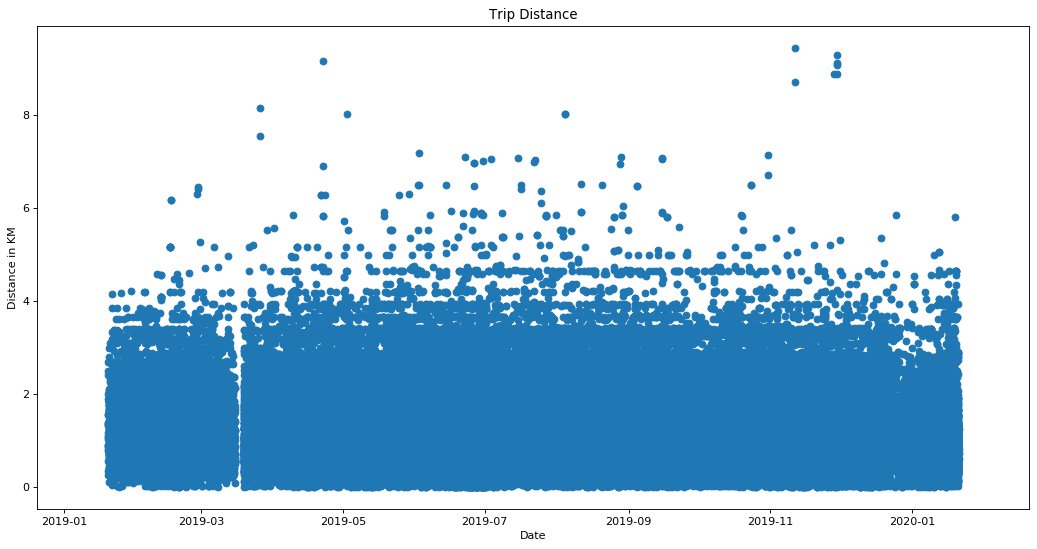

In [50]:
# We start by creating a new column called 'start', that we'll need later to
# sum up all the rides that take place in a single hour.

marburg['start'] = marburg.index.floor(freq = "H")
#marburg['end'] = marburg.index + pd.to_timedelta(marburg['trip_duration_mins'], unit='m')

# Let's create a simple scatter plot to show all of the distances of each individual ride.

fig,ax = plt.subplots(figsize=(16,8), dpi= 80) 
ax.scatter(marburg["start"], marburg["trip_distance"])
ax.set_title("Trip Distance")
ax.set_xlabel("Date")
ax.set_ylabel("Distance in KM")
plt.show()

In [54]:
# Here we create a new Dataframe to sum up the trip_distances of all rides that took place in one hour

hourly_distance_marburg = pd.DataFrame()
hourly_distance_marburg["distance"] = marburg["trip_distance"].groupby(marburg["start"]).sum()

# This is what the Dataframe looks like

hourly_distance_marburg.head(10)

,distance
start,
2019-01-20 00:00:00,8.413924
2019-01-20 01:00:00,12.283895
2019-01-20 02:00:00,5.552752
2019-01-20 03:00:00,0.559740
2019-01-20 04:00:00,2.730626
2019-01-20 05:00:00,1.608936
2019-01-20 06:00:00,1.286251
2019-01-20 07:00:00,4.745243
2019-01-20 08:00:00,4.215268


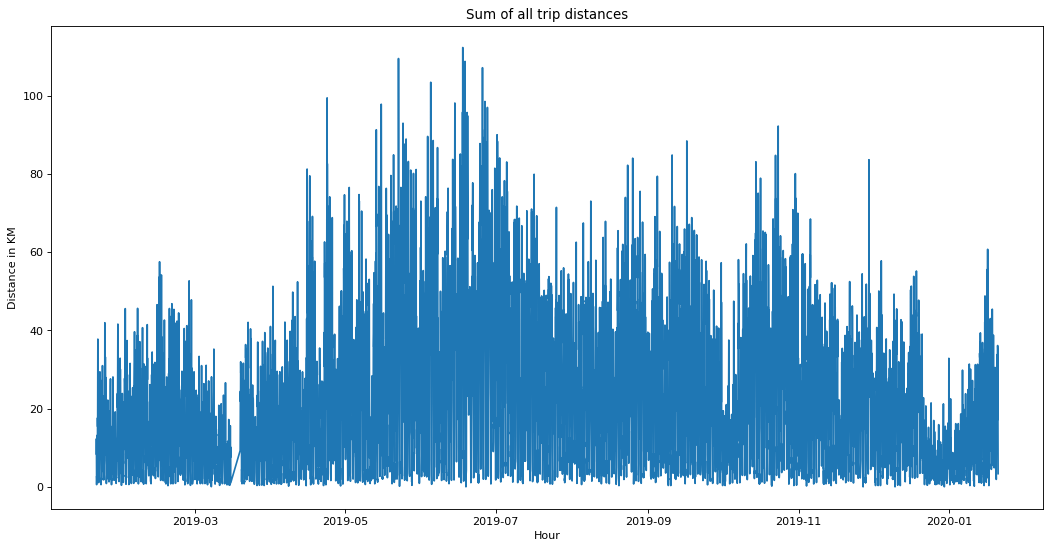

In [68]:
# Now, let us visualize this KPI, which is the total distance traveled by all bikes in the span of an hour.

fig,ax = plt.subplots(figsize=(16,8), dpi= 80) 
ax.plot(hourly_distance_marburg["distance"])
ax.set_title("Sum of all trip distances")
ax.set_xlabel("Hour")
ax.set_ylabel("Distance in KM")
plt.show()

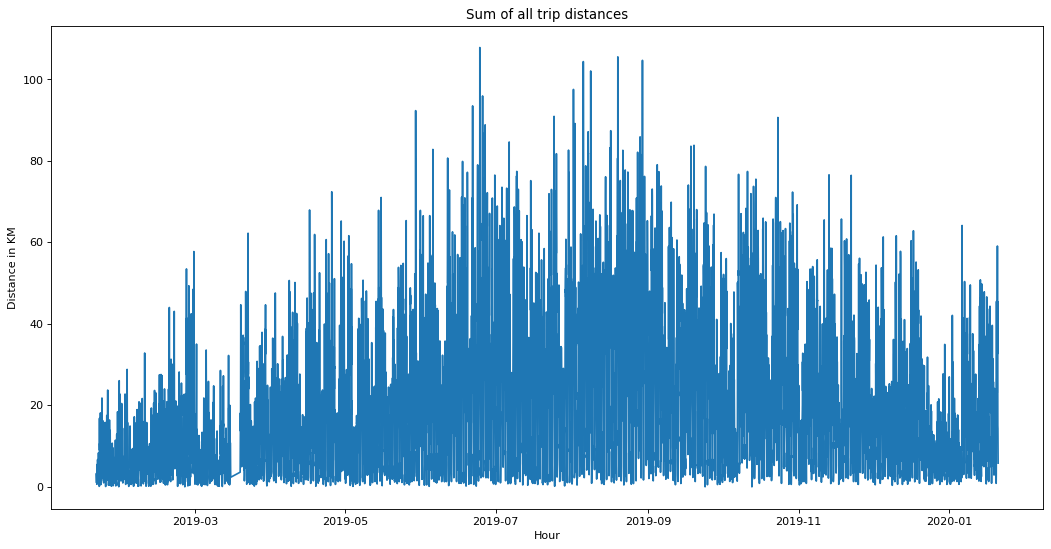

In [69]:
# We will once again repeat this for the Duisburg data.

duisburg['start'] = duisburg.index.floor(freq = "H")
hourly_distance_duisburg = pd.DataFrame()
hourly_distance_duisburg["distance"] = duisburg["trip_distance"].groupby(duisburg["start"]).sum()
fig,ax = plt.subplots(figsize=(16,8), dpi= 80) 
ax.plot(hourly_distance_duisburg["distance"])
ax.set_title("Sum of all trip distances")
ax.set_xlabel("Hour")
ax.set_ylabel("Distance in KM")
plt.show()

## Quality of fleet (Julia)

Another key performance indicator is the quality of the bikes.   
We can assume that if a bike is'nt used for 1 week or longer it is probably broken or can't be accessed.
The percentage of bikes that overstep this threshold value can tells us the quality of the fleet.

## Spread of fleet / coverage (Moritz)